<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

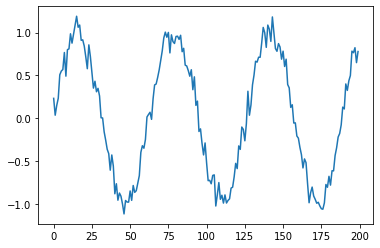

In [42]:
plt.plot(np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1 )

In [43]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

In [44]:
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X)
Y = np.array(Y)

In [45]:
X.shape

(190, 10)

In [46]:
Y.shape

(190,)

In [47]:
N = len(X)

In [48]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer = Adam(lr=0.1),
)

In [49]:
r = model.fit(
    X[:N//2], Y[:N//2],
    epochs = 100,
    validation_data= (X[N//2:], Y[N//2:])
)

Epoch 1/100
3/3 [==============================] - 0s 36ms/step - loss: 1.6752 - val_loss: 0.7241
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.9282 - val_loss: 0.8838
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.6175 - val_loss: 0.3748
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2947 - val_loss: 0.2729
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2847 - val_loss: 0.1188
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0909 - val_loss: 0.0453
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0701 - val_loss: 0.0763
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0848 - val_loss: 0.0499
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0532 - val_loss: 0.1000
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0842 - val_loss: 0.0991
Epoch 11/100
3/3 [==========

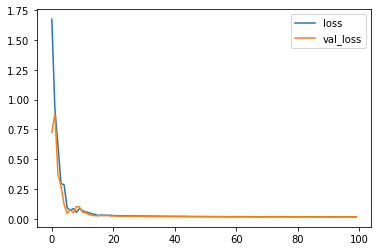

In [50]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [51]:
# Wrong forecast using true

validation_target = Y[-N//2:]
validation_prediction = []


i = -N//2

for k in range(len(validation_target)):
  p = model.predict(X[i+k].reshape(1,-1))[0,0]
  validation_prediction.append(p)


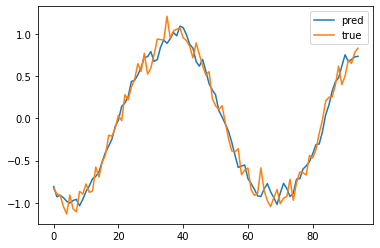

In [52]:
plt.plot(validation_prediction, label='pred')
plt.plot(validation_target, label='true')
plt.legend()

In [53]:
#Now the correct way to forecast

validation_target = Y[-N//2:]
validation_prediction = []


last_x = X[-N//2]

for _ in range(len(validation_target)):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_prediction.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p
 

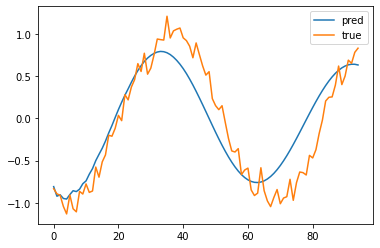

In [54]:
plt.plot(validation_prediction, label='pred')
plt.plot(validation_target, label='true')
plt.legend()